<a href="https://colab.research.google.com/github/namanko/summer-of-code-2024/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
import os

In [2]:
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
os.environ['KAGGLE_USER'] = userdata.get('KAGGLE_USER')


**Loading dataset**

In [3]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection
License(s): CC0-1.0
 93% 166M/178M [00:01<00:00, 113MB/s]
100% 178M/178M [00:01<00:00, 111MB/s]


In [4]:
!unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [3]:
import pandas as pd
import numpy as np

In [4]:
fraud_csv = pd.read_csv('onlinefraud.csv')
fraud_csv

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


**Data Cleaning and Preprocressing**

In [5]:
train_csv =  fraud_csv.drop(['isFlaggedFraud'],axis=1)
train_csv

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [6]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [7]:
train_csv = train_csv.dropna()


In [8]:
train_csv.duplicated().sum()

0

In [9]:
train_csv['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
train_csv_enc = pd.get_dummies(train_csv,columns=['type'])

In [11]:
train_csv_enc['type_CASH_IN'] = train_csv_enc['type_CASH_IN'].astype(int)
train_csv_enc['type_CASH_OUT'] = train_csv_enc['type_CASH_OUT'].astype(int)
train_csv_enc['type_DEBIT'] = train_csv_enc['type_DEBIT'].astype(int)
train_csv_enc['type_PAYMENT'] = train_csv_enc['type_PAYMENT'].astype(int)
train_csv_enc['type_TRANSFER'] = train_csv_enc['type_TRANSFER'].astype(int)

In [12]:
train_csv_enc

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


**Feature Engineering**

In [13]:
train_csv_enc['Origdiff'] = train_csv_enc['newbalanceOrig'] - train_csv_enc['oldbalanceOrg']
train_csv_enc['Destdiff'] = train_csv_enc['newbalanceDest'] - train_csv_enc['oldbalanceDest']

In [14]:
train_csv_enc

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Origdiff,Destdiff
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0,-9839.64,0.00
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0,-1864.28,0.00
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1,-181.00,0.00
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0,-181.00,-21182.00
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0,-11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0,-339682.13,339682.13
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1,-6311409.28,0.00
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0,-6311409.28,6311409.27
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1,-850002.52,0.00


**Dealing with Class Imbalance - SMOTE**

In [15]:
x_train = train_csv_enc.drop(['step','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud'],axis=1)
y_train = train_csv_enc['isFraud']

In [16]:
x_train

,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Origdiff,Destdiff
0,9839.64,0,0,0,1,0,-9839.64,0.00
1,1864.28,0,0,0,1,0,-1864.28,0.00
2,181.00,0,0,0,0,1,-181.00,0.00
3,181.00,0,1,0,0,0,-181.00,-21182.00
4,11668.14,0,0,0,1,0,-11668.14,0.00
...,...,...,...,...,...,...,...,...
6362615,339682.13,0,1,0,0,0,-339682.13,339682.13
6362616,6311409.28,0,0,0,0,1,-6311409.28,0.00
6362617,6311409.28,0,1,0,0,0,-6311409.28,6311409.27
6362618,850002.52,0,0,0,0,1,-850002.52,0.00


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   amount         float64
 1   type_CASH_IN   int64  
 2   type_CASH_OUT  int64  
 3   type_DEBIT     int64  
 4   type_PAYMENT   int64  
 5   type_TRANSFER  int64  
 6   Origdiff       float64
 7   Destdiff       float64
dtypes: float64(3), int64(5)
memory usage: 388.3 MB


In [18]:
y_train

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [19]:
x = np.array(x_train)
y = np.array(y_train)


In [20]:
from sklearn.model_selection import train_test_split
X_tr,X_te,Y_tr,Y_te = train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
len(X_te),len(Y_te)

(1590655, 1590655)

In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_tr == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_tr == 0)))

Before OverSampling, counts of label '1': 6168
Before OverSampling, counts of label '0': 4765797 



In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.2,random_state = 42)
X,Y = sm.fit_resample(X_tr,Y_tr)

In [24]:
print("After OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y == 0)))

After OverSampling, counts of label '1': 953159
After OverSampling, counts of label '0': 4765797


**Logistic Regression Model**

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

In [26]:
pred = lr.predict(X_te)

**Model Evaluation**

In [27]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(Y_te,pred))
print('Roc-auc-score:',roc_auc_score(Y_te,pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1588610
           1       0.01      0.99      0.01      2045

    accuracy                           0.78   1590655
   macro avg       0.50      0.89      0.44   1590655
weighted avg       1.00      0.78      0.88   1590655

Roc-auc-score: 0.8850950344882548


**XGBoost Model**

In [28]:
import xgboost as xgb

In [29]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss")

In [30]:
xgb_clf.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [31]:
pred_new = xgb_clf.predict(X_te)

**Model Evaluation**

In [32]:
print(classification_report(Y_te, pred_new))
print('Roc-auc-score:',roc_auc_score(Y_te,pred_new))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1588610
           1       0.07      0.91      0.12      2045

    accuracy                           0.98   1590655
   macro avg       0.53      0.94      0.56   1590655
weighted avg       1.00      0.98      0.99   1590655

Roc-auc-score: 0.9442886162310491


Both roc-auc-score and recall saw significant improvements!

**SHAP Values for Explaining Model**

In [34]:
import pickle

model_pkl_file = "fraud_detection_model_fin.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(xgb_clf, file)

In [35]:
!pip install shap

In [42]:
X_sampled = X_te[:1000]


In [43]:
import shap

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_sampled)

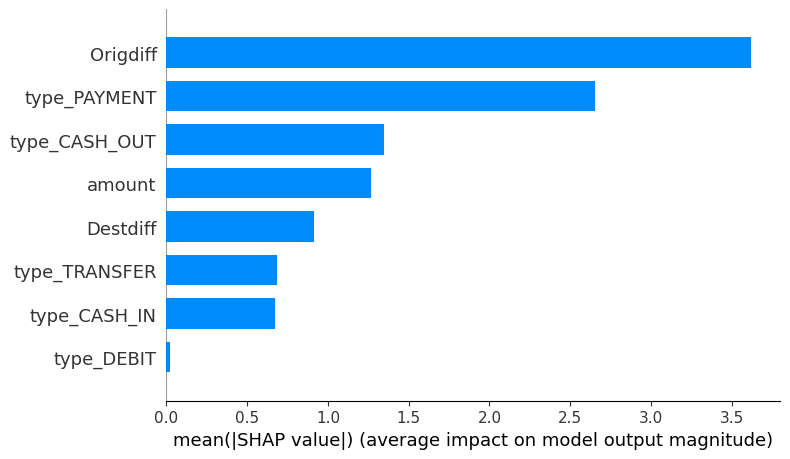

In [44]:
shap.summary_plot(shap_values, X_sampled, plot_type='bar',feature_names=['amount',	'type_CASH_IN',	'type_CASH_OUT',	'type_DEBIT',	'type_PAYMENT',	'type_TRANSFER',	'Origdiff',	'Destdiff'])


Therefore the difference in the balance of the initiator of a transaction plays an important role in deciding whether it is a fraud or not.